# CRIM Intervals:  Melodic and Harmonic

### Reminders:

#### Import Music Files

* If you are exploring pieces from CRIM, importing simply involves providing the CRIM URL of the MEI file:  
    * **`piece = importScore('https://crimproject.org/mei/CRIM_Model_0008.mei')`**

* But you can also use the Notebook with any MEI, MusicXML, or MIDI file of your own. You can easily do this when you run the Notebooks on Jupyter Hub, you will also find a folder called **`Music_Files`**.  Upload the file here, then provide the path to that file: 
    * **`piece = importScore('Music_Files/My_File_Name.mei')`**.  

#### Save outputs as CSV or Excel

* The Jupyter Hub version of these Notebooks also provides a folder called **`saved_csv`**.  You can save **csv** files of any data frame there with this command: 
    * **`notebook_data_frame_name.to_csv('saved_csv/your_file_title.csv')`**.
* If you prefer **Excel** documents (which are better for anything with a complex set of columns or hierarhical index), use **ExcelWriter**.  In the following code, you will need to provide these commands:
    * **`writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')`**
* Now convert your dataframe to Excel
    * **`frame_name.to_excel(writer, sheet_name='Sheet1')`**
* And finally save the new file to the folder here in the Notebook:
    * **`writer.save()`**

Put the following code to a new cell and update the frame_name and file_name:

`writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')` <br>
`frame_name.to_excel(writer, sheet_name='Sheet1')` <br>
`writer.save()` <br>

#### Read Documentation for Each Method
- Read the documentation with this command ```print(piece.YourMethod.__doc__)```, where you will replace ```'YourMethod'``` with the name of the individual method, for example ```print(piece.melodic.__doc__)```.


*** 

## A. Import Intervals and Other Code

* The first step is to import all the code required for the Notebook
* **`arrow/run`** or **`Shift + Enter`** in the following cell:

In [110]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests
import os
import glob as glob


MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)

else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


## B. Importing a Piece

### B.1 Import a Piece

In [4]:
# Select a prefix:

# prefix = 'Music_Files/'
prefix = 'https://crimproject.org/mei/'
# Add your filename here

mei_file = 'CRIM_Model_0008.mei'

url = prefix + mei_file

piece = importScore(url)

print(piece.metadata)


Successfully imported https://crimproject.org/mei/CRIM_Model_0008.mei
{'title': 'Ave Maria', 'composer': 'Josquin Des Prés'}


## C. Melodic Patterns

** CRIM Intervals, as the name suggests, can tell us a lot about the **distances between notes**

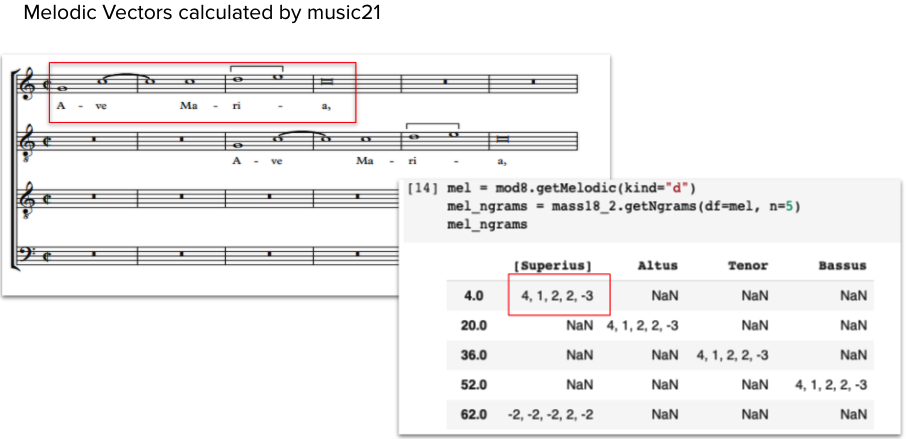


### C.1 Get the melodic intervals for each voice

* **`piece.melodic(kind="d")`** is the basic method to find any type of melodic interval

* Note that **`kind`** is a variable--you can change it, then run the cell to see the results.
<br>

* **`q`** = **diatonic with 'quality'** (thus distinguishing between P8, M3, and m3 intervals)
* **`d`** = **diatonic without quality** (just the interval:  8, 3)
* **`c`** = **chromatic** (here a unison will be **0**, and a tritone will be **6**)
* **`z`** = **zero-based** (diatonic, but with unison is represented as "0")
<br>
    
* compound intervals?
    * add **`compound=True`** to see 10ths and 3rds as different; **`compound=False`** for them to be the same.  
    * For example:  **`piece.melodic(kind="d", compound=True).fillna('-')`**
    
* no unisons?

    * adding **`combineUnisons=True`** to the request for `piece.notes()` will combine all unisons to a single note.  The total duration will be the same as for the individual notes, but now getMelodic (and getNgrams) will follow the contour of the melody as if there were no repeated note
    * For example:  **`piece.melodic(kind="d", combineUnisons=True)`**
    
* Read the Documentation:  `print(piece.melodic.__doc__)`
    

In [5]:
mel = piece.melodic(kind='d')
mel.head(50)

,[Superius],Altus,Tenor,Bassus
0.0,NaN,Rest,Rest,Rest
4.0,4,NaN,NaN,NaN
8.0,NaN,Rest,Rest,Rest
12.0,1,NaN,NaN,NaN
16.0,2,NaN,Rest,Rest
20.0,2,4,NaN,NaN
24.0,-3,NaN,Rest,Rest
28.0,NaN,1,NaN,NaN
32.0,Rest,2,NaN,Rest
36.0,NaN,2,4,NaN


In [6]:
mel = piece.melodic(kind="d").fillna('-')
mel.head(20)


,Cantus,Altus,Quintus,Tenor,Sextus,Bassus
0.0,-,-,Rest,Rest,Rest,Rest
8.0,3,8,Rest,-,Rest,Rest
14.0,1,1,-,-,-,-
16.0,-2,-2,Rest,5,Rest,Rest
20.0,-3,-3,-,-,-,-
22.0,-,-,-,1,-,-
24.0,2,2,Rest,-2,Rest,Rest
28.0,2,-2,-,-3,-,-
32.0,-,-,-,2,4,-
34.0,-2,-,-,-,-,-


### C.2  Counting Intervals (and other operations)

* The Pandas library includes a vast array of standard methods for working with data frames (renaming columns, sorting data, counting categories, etc).  You can read just a few of the basic ones here:  **https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf**

<br>

* Using our dataframe of notes+rests (**`nr`**), you can experiment with a few (try them out below):

    * **count the number of rows** (which tells us simply how large the dataframe is):  **`nr.count`**
    * **rename a columns**:  **`nr.rename(columns = {'[Superius]':'Cantus'})`**
    * **stack all the columns** on top of each other to get one list of all the notes:  **`nr.stack()`**
    * **stack and count the number of unique values** (which will tell us how many different tones are in this piece): **`nr.stack().nunique()`**
    * **count the number of each note in each part**:  **`nr.apply(pd.Series.value_counts).fillna(0).astype(int)`**
    * **count and sort** the number of notes in a single voice part:  **`nr.apply(pd.Series.value_counts).fillna(0).astype(int).sort_values("[Superius]", ascending=False)`**

In [6]:
# Sort All Intervals by Size and Direction, with counts for each voice

int_order = ["P1", "m2", "M2", "m3", "M3", "P4", "P5", "m6", "M6", "m7", "M7", "P8",
             "-m2", "-M2", "-m3", "-M3", "-P4", "-P5", "-m6", "-M6", "-m7", "-M7", "-P8"]
mel = piece.melodic()
mel = mel.fillna("-")

# count up the values in each item column--sum for each pitch.  
# make a copy to be sure we don't mess up
mel = mel.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()

# rename the index column to something more useful
mel.rename(columns = {'index':'interval'}, inplace = True)

# apply the categorical list and sort
mel['interval'] = pd.Categorical(mel["interval"], categories=int_order)
mel = mel.sort_values(by = "interval").dropna().copy()
mel.reset_index()

,index,interval,[Superius],Altus,Tenor,Bassus
0,11,P1,40,37,36,28
1,16,m2,21,27,20,22
2,8,M2,44,52,44,43
3,17,m3,2,2,3,0
4,9,M3,0,3,1,2
5,12,P4,10,5,8,6
6,13,P5,1,7,0,8
7,18,m6,1,0,0,0
8,10,M6,0,1,0,0
9,14,P8,0,3,3,3


### Chart of Intervals in Each Voice


title : Ave Maria
composer : Josquin Des Prés


<AxesSubplot:xlabel='interval'>

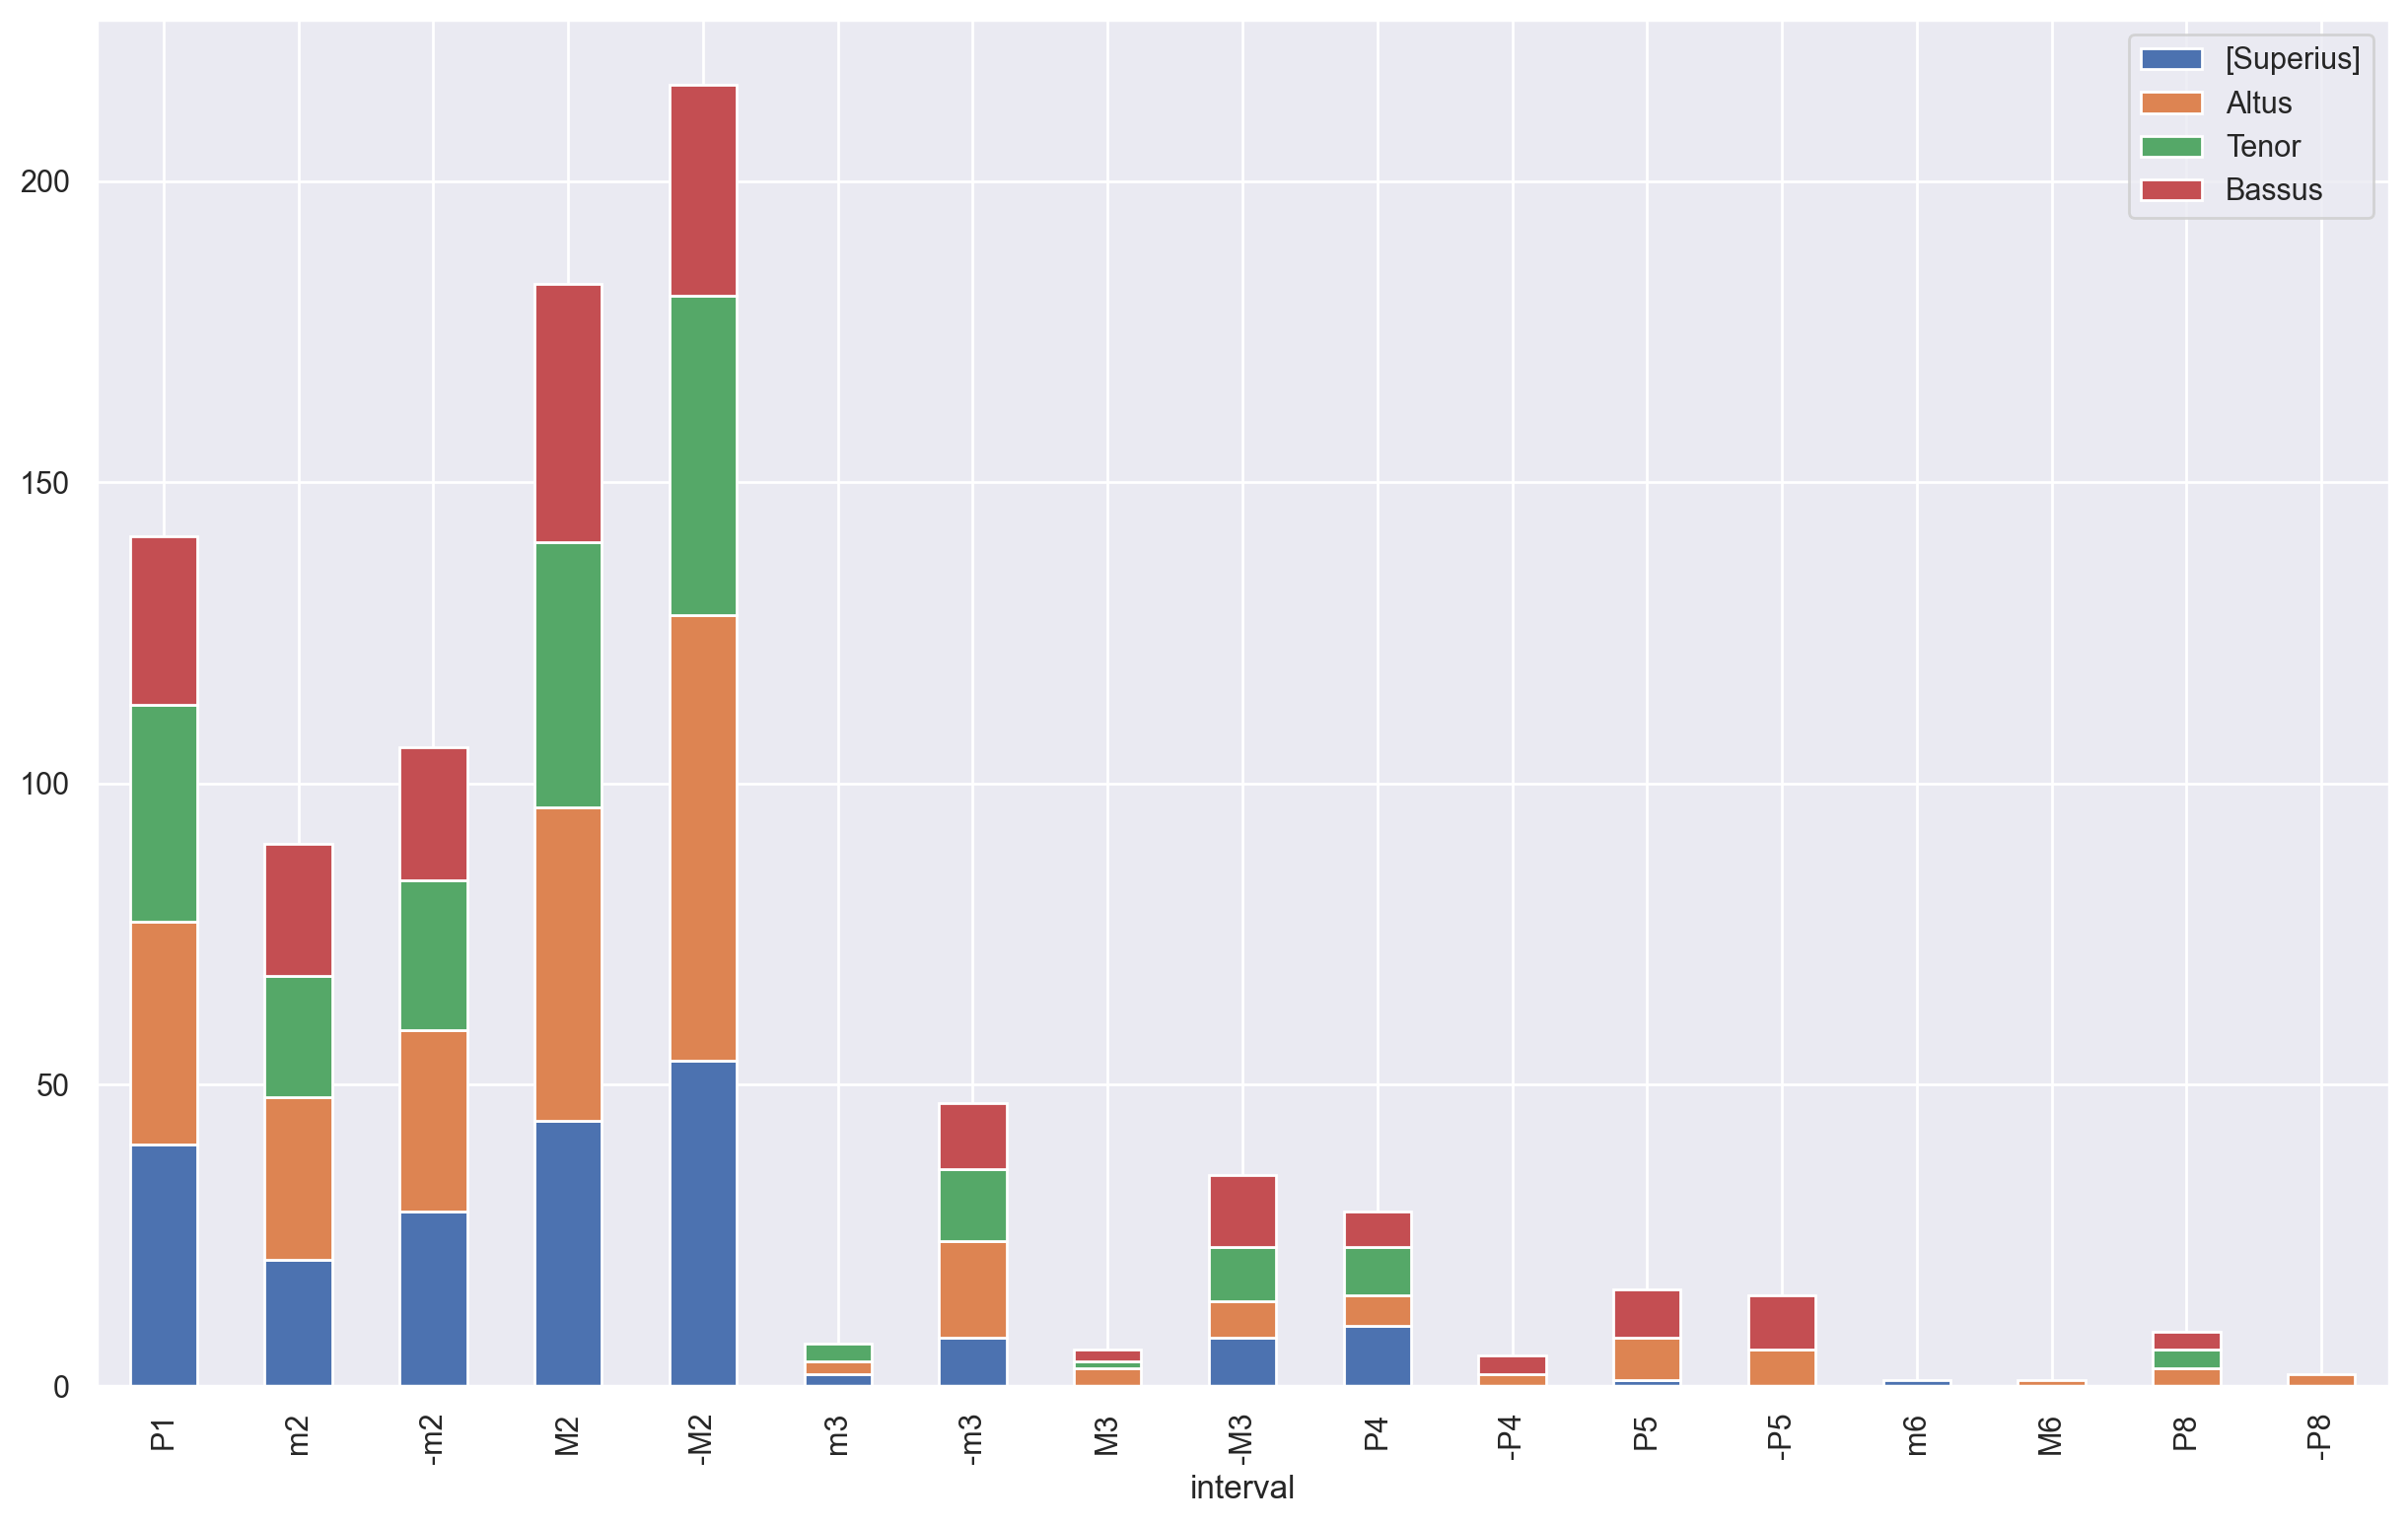

In [7]:
%matplotlib inline
int_order = ["P1", "m2", "-m2", "M2", "-M2", "m3", "-m3", "M3", "-M3", "P4", "-P4", "P5", "-P5", 
             "m6", "-m6", "M6", "-M6", "m7", "-m7", "M7", "-M7", "P8", "-P8"]

mel = piece.melodic()
mel = mel.fillna("-")

# count up the values in each item column--sum for each pitch.  
# make a copy to be sure we don't mess up
mel = mel.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()

# rename the index column to something more useful
mel.rename(columns = {'index':'interval'}, inplace = True)

# apply the categorical list and sort
mel['interval'] = pd.Categorical(mel["interval"], categories=int_order)
mel = mel.sort_values(by = "interval").dropna().copy()

voices = mel.columns.to_list()
palette = sns.husl_palette(len(voices), l=.4)
md = piece.metadata
for key, value in md.items():
    print(key, ':', value)
# print(voices)
sns.set(rc={'figure.figsize':(15,9)})
mel.set_index('interval').plot(kind='bar', stacked=True)


### C.2 Get Melodic nGrams
* **Ngrams** are used in linguistics (and other fields)--they are continuous strings of characters or events, and can help us find similar **soggetti** or even predict **presentation types**.
<br><br>
* CRIM Intervals can create **melodic** or **harmonic** nGrams.  These can be some **fixed length**, or up to the **maximum before the next rest**.  We set this length with the `n` (as in `n=4`; to use maximum length nGrams, use `n=-1` [negative one])
<br><br>
* To use the `ngrams` method, we "pass" the results of `piece.melodic()` or `piece.harmonic()` (see below) to it.  For instance we set the variable name `mel` = `piece.melodic(kind="d", compound=False)` , and then pass `mel` to the nGram method, for instance:  `piece.ngrams(df=mel, n=4)`  
<br>
* We could also combine these steps in a single line of code: 
    * `ngrams = piece.ngrams(df=piece.melodic(kind="d", compound=False), n=4)`
    
* **Moving Window** or **Limit to Entries**?

    * By default the melodic ngrams will be a **moving window** of whatever length 'n' is chosen.  So for n="4" we would see notes 1-4, 2-5, 3-6, etc as the results.  This is helpful if you would like to see all of the substrings in a melody.
    * But **Limit to Entries** can be useful if we only want ngrams that follow a rest or section break, as these are useful in finding key Presentation Types or other markers of 'segments' in the piece.  For this we use a mask: `mask = piece.entryMask()
result = ng[mask].dropna(how='all')`
    
   
* **No Unisons**?  
    * As noted above, we can use `combineUnisons=True` to remove repeated notes from nGrams.  See cell below.
    
* **Drop NULL (NaN) values**?
    * `dropna(how="all")` allows you to all rows (offsets) where all voices are silent (NaN in all parts)
    * `fillna('-')` allows you to fill NaNs will any character
    
* **Read the documentation**:  `print(piece.ngrams.__doc__)`

In [8]:
mel = piece.melodic(kind="d")
ng = piece.ngrams(df=mel, n=5)
ng

,[Superius],Altus,Tenor,Bassus
4.0,"(4, 1, 2, 2, -3)",NaN,NaN,NaN
20.0,NaN,"(4, 1, 2, 2, -3)",NaN,NaN
36.0,NaN,NaN,"(4, 1, 2, 2, -3)",NaN
52.0,NaN,NaN,NaN,"(4, 1, 2, 2, -3)"
62.0,"(-2, -2, -2, 2, -2)",NaN,NaN,NaN
...,...,...,...,...
1208.0,NaN,NaN,"(-2, 1, -2, 2, 2)","(5, 1, -2, -2, -2)"
1212.0,NaN,NaN,NaN,"(1, -2, -2, -2, -2)"
1240.0,"(1, -2, -2, -2, 2)","(1, 1, -3, 2, 2)","(1, -2, 2, 2, -2)","(8, -4, 2, -2, -5)"
1244.0,"(-2, -2, -2, 2, 1)","(1, -3, 2, 2, 1)","(-2, 2, 2, -2, 1)","(-4, 2, -2, -5, 1)"


In [10]:
pd.options.display.max_rows = 999

In [11]:
nr = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr, kind='d', end=False)
ng = piece.ngrams(df=mel, n=4)
ng

,Cantus,Altus,Quintus,Tenor,Sextus,Bassus
0.0,"(3, -2, -3, 2)","(8, -2, -3, 2)",NaN,NaN,NaN,NaN
8.0,"(-2, -3, 2, 2)","(-2, -3, 2, -2)",NaN,"(5, -2, -3, 2)",NaN,NaN
16.0,"(-3, 2, 2, -2)",NaN,NaN,"(-2, -3, 2, -2)",NaN,NaN
20.0,"(2, 2, -2, -2)",NaN,NaN,NaN,NaN,NaN
24.0,"(2, -2, -2, 2)",NaN,NaN,"(-3, 2, -2, -3)",NaN,NaN
28.0,"(-2, -2, 2, 2)",NaN,NaN,"(2, -2, -3, 2)","(4, -2, -3, 2)",NaN
32.0,NaN,NaN,"(3, -2, -3, 2)","(-2, -3, 2, 2)","(-2, -3, 2, -2)","(5, -2, -3, 2)"
40.0,NaN,NaN,"(-2, -3, 2, -2)","(-3, 2, 2, -2)",NaN,"(-2, -3, 2, -2)"
44.0,NaN,NaN,NaN,"(2, 2, -2, -2)",NaN,NaN
48.0,NaN,NaN,NaN,"(2, -2, -2, 2)",NaN,NaN


In [12]:
piece.ngrams(interval_settings='d')

,Bassus_Sextus,Bassus_Tenor,Bassus_Quintus,Bassus_Altus,Bassus_Cantus,Sextus_Tenor,Sextus_Quintus,Sextus_Altus,Sextus_Cantus,Tenor_Quintus,Tenor_Altus,Tenor_Cantus,Quintus_Altus,Quintus_Cantus,Altus_Cantus
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8_8, 3_1, 3"
8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8_Held, 8_5, 3","10_Held, 10_5, 5",NaN,NaN,"3_1, 3_-2, 3"
14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8_5, 3_Held, 1","10_5, 5_Held, 3",NaN,NaN,"3_-2, 3_-3, 3"
16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3_Held, 1_1, 1","5_Held, 3_1, 3",NaN,NaN,"3_-3, 3_2, 3"
20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1_1, 1_-2, 3","3_1, 3_-2, 5",NaN,NaN,"3_2, 3_-2, 5"
22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1_-2, 3_-3, 4","3_-2, 5_-3, 8",NaN,NaN,NaN
24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3_-3, 4_2, 3","5_-3, 8_2, 7",NaN,NaN,"3_-2, 5_Held, 4"
28.0,NaN,NaN,NaN,NaN,NaN,"5_4, 3_1, 3",NaN,NaN,"12_4, 9_Held, 8",NaN,NaN,"8_2, 7_Held, 6",NaN,NaN,"5_Held, 4_Held, 3"
32.0,"8_Held, 8_5, 3","10_5, 5_Held, 3","12_5, 10_1, 10",NaN,"16_Held, 15_Held, 14","3_1, 3_-2, 3","5_1, 5_-2, 8",NaN,"9_Held, 8_Held, 7","3_-2, 6_-3, 8",NaN,"7_Held, 6_Held, 5",NaN,"5_Held, 4_Held, 3",NaN
34.0,NaN,NaN,NaN,NaN,"15_Held, 14_Held, 15",NaN,NaN,NaN,"8_Held, 7_Held, 8",NaN,NaN,"6_Held, 5_Held, 6",NaN,"4_Held, 3_Held, 4",NaN


In [13]:
nr = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr, kind='d', end=False)
ng = piece.ngrams(df=mel, n=4)
mask = piece.entryMask()
result = ng[mask].dropna(how='all')
result.head(20)


,Cantus,Altus,Quintus,Tenor,Sextus,Bassus
0.0,"(3, -2, -3, 2)","(8, -2, -3, 2)",NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,"(5, -2, -3, 2)",NaN,NaN
28.0,NaN,NaN,NaN,NaN,"(4, -2, -3, 2)",NaN
32.0,NaN,NaN,"(3, -2, -3, 2)",NaN,NaN,"(5, -2, -3, 2)"
62.0,NaN,NaN,NaN,NaN,"(5, -2, -2, -2)",NaN
66.0,"(2, -2, -2, -2)",NaN,NaN,NaN,NaN,NaN
68.0,NaN,"(4, -2, -2, -2)",NaN,NaN,NaN,NaN
90.0,NaN,NaN,NaN,"(5, -2, -2, -2)",NaN,NaN
92.0,NaN,NaN,NaN,NaN,NaN,"(4, -2, -2, -2)"
96.0,NaN,NaN,"(4, -2, -2, -2)",NaN,NaN,NaN



We can also display **measure+beat addresses**

*  The results of the previous **ngram** method are now 'passed' to the **detailIndex** method

In [14]:
piece.detailIndex(df=result, offset=True, beat=False)

Cantus            Altus          Quintus  \
Measure Offset                                                      
1       0.0      (3, -2, -3, 2)   (8, -2, -3, 2)              NaN   
2       8.0                 NaN              NaN              NaN   
4       28.0                NaN              NaN              NaN   
5       32.0                NaN              NaN   (3, -2, -3, 2)   
8       62.0                NaN              NaN              NaN   
9       66.0    (2, -2, -2, -2)              NaN              NaN   
        68.0                NaN  (4, -2, -2, -2)              NaN   
12      90.0                NaN              NaN              NaN   
        92.0                NaN              NaN              NaN   
13      96.0                NaN              NaN  (4, -2, -2, -2)   
14      108.0               NaN              NaN              NaN   
16      124.0    (2, -2, -3, 2)   (2, -2, -3, 2)              NaN   
17      128.0               NaN              NaN              NaN   
19      148.0               NaN              NaN              NaN   
20      152.0               NaN              NaN   (3, -2, -3, 2)   
23      182.0               NaN              NaN              NaN   
24      186.0   (2, -2, -2, -2)              NaN              NaN   
        188.0               NaN  (4, -2, -2, -2)              NaN   
27      210.0               NaN              NaN              NaN   
        212.0               NaN              NaN              NaN   
28      216.0               NaN              NaN  (4, -2, -2, -2)   
29      228.0               NaN              NaN              NaN   
31      242.0               NaN  (-2, 2, -3, -3)              NaN   
        244.0    (-3, 2, -3, 2)              NaN              NaN   
        246.0               NaN              NaN              NaN   
33      262.0               NaN              NaN              NaN   
34      270.0               NaN  (-2, -2, -2, 2)   (2, 3, -2, -2)   
36      284.0   (-3, 4, -2, -2)              NaN              NaN   
37      294.0               NaN              NaN              NaN   
40      314.0               NaN              NaN              NaN   
        316.0               NaN              NaN  (-3, 4, -2, -2)   
41      326.0               NaN              NaN              NaN   
42      330.0               NaN    (2, 2, 2, -2)              NaN   
44      344.0               NaN              NaN              NaN   
45      352.0    (4, -2, -2, 2)              NaN              NaN   
        354.0               NaN              NaN              NaN   
47      374.0               NaN  (-2, 2, -3, -2)              NaN   
49      386.0               NaN              NaN   (-2, 2, 3, -2)   
        390.0    (2, 2, -2, -2)              NaN              NaN   
50      398.0               NaN              NaN              NaN   
53      416.0               NaN              NaN              NaN   
        422.0               NaN              NaN  (-2, -2, 2, -3)   
56      440.0   (-2, -2, 2, -3)              NaN              NaN   
        442.0               NaN              NaN              NaN   
        444.0               NaN  (-2, -2, 2, -3)              NaN   
57      455.0               NaN              NaN              NaN   
60      474.0               NaN              NaN              NaN   
61      480.0               NaN              NaN              NaN   
63      500.0               NaN   (-2, -3, 2, 3)              NaN   
64      508.0    (-3, 2, 2, -2)              NaN              NaN   
65      514.0               NaN              NaN              NaN   
        516.0               NaN              NaN   (-2, -3, 2, 2)   
69      548.0               NaN              NaN              NaN   
        550.0               NaN    (3, 2, -3, 2)              NaN   
70      554.0               NaN              NaN              NaN   

                          Tenor           Sextus           Bassus  
Measure Offset         

### C.3 How Many nGrams?

* Pandas includes many **built-in methods** that make it simple to summarize and explore data
<br>

* `value_counts()` tells us how many of each nGram in each voice:  `ngrams.value_counts().to_frame()`
    
<br>

* `stack()` combines all the voices into one column, so we can see the nGrams of the piece in one view: 
`ngrams.stack().value_counts().to_frame()`

In [15]:
ng.value_counts().to_frame()

,,,,,,0
Cantus,Altus,Quintus,Tenor,Sextus,Bassus,
"(-2, 3, -2, -2)","(-2, -2, -2, 2)","(-3, 2, 2, 2)","(-2, -2, -2, -2)","(2, 2, -3, 2)","(4, -2, 2, -2)",1


In [16]:
ng.stack().value_counts().to_frame()

,0
"(4, -2, -2, -2)",24
"(-2, -2, -2, -2)",24
"(-2, -2, -2, 2)",16
"(-2, -2, 4, -2)",14
"(-2, -2, -2, 4)",13
"(-2, 4, -2, -2)",12
"(-2, -3, 2, -2)",11
"(-2, -2, 2, 2)",10
"(2, 2, -2, -2)",9
"(2, -2, -2, -2)",8


### C.4 Search for Melodic nGrams

*  Here we can use Python tools to **search for any given 'string' of intervals**, and highlight them in the resulting data frame.
<br>

    * Note that we can also search at any given **constant time unit** (such as every 2 offsets = half note)
    * To do this we just add `unit=n` to the `getNgrams` request
    * We can also select to display as offsets or measures/beats
    
<br>

* Use the boxes below to **interact** with the code without needing to write it!
    * `search_pattern` returns any nGram with the interval sequence you use.  Include comma and space after each interval.
    * `kind` selects **quality**, **diatonic**, **chromatic**, or **zero**
    * `compound` will be **true** or **false**
    * `length` is the **length** of the `nGram` (three intervals is of course four notes); use `-1` for maximum length before any given rest.
    * `style` determines whether the results are listed by **offset** or **measure + beat**
    * `endpoint` determines whether the offset (or measure + beat) represents **first note** of the pattern or the **last**.  

<br>

* Sample search for **Model_0008**:  `4, 1, 2, 2, -3`  (use `kind="d"` and `length=5`)

<br>
    * Notice the regular time intervals between identical nGrams--the **classifier** can use this to predict presentation types.

In [111]:
nr = piece.notes(combineUnisons=True)

In [112]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out
@interact
def get_ngrams(search_pattern="", kind=["d", "q", "c", "z"], unisons=[False, True], compound=[True, False], length=[2, 3, 4, 5, 6], endpoint=["first", "last"]):
    nr = piece.notes(combineUnisons=unisons)
    ngrams = piece.ngrams(df=piece.melodic(df=nr, kind=kind), n=length, offsets=endpoint)
    ngrams = ngrams.applymap(convertTuple)
    mask = ngrams.apply(lambda x: x.apply(str).str.contains(search_pattern).any(), axis=1)

    filtered_ngrams = ngrams[mask].copy()
    filtered_ngrams.astype(str).copy
    
    beats_measures_mel = piece.detailIndex(filtered_ngrams, offset=True)

    return beats_measures_mel.fillna("-").applymap(str).style.applymap(lambda x: "background: #ccebc5" if re.search(search_pattern, x) else "")

    

interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

## D. Harmonic Intervals and nGrams

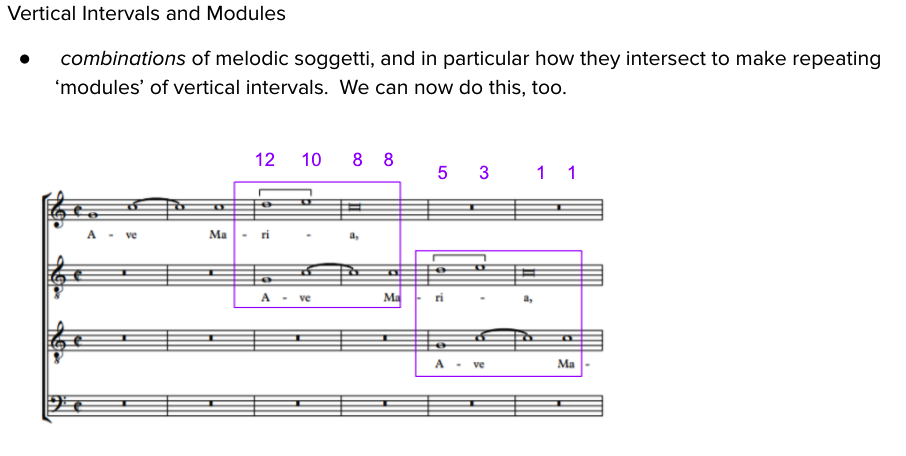

### D.1 Harmonic Intervals

* Specify **kind** as above (`q`, `d`, `c`, `z`)
* Choose **compound** (`=True`) or **simple** (`=False`)
* For example:  **`piece.harmonic(kind="d", compound=True)`**

**Drop NULL (NaN) values?**

* dropna(how="all") allows you to all rows (offsets) where all voices are silent (NaN in all parts)
fillna('-') allows you to fill NaNs will any character
* For example:  **`piece.harmonic(kind="d", compound=True).fillna('-')`**


In [83]:
harm = piece.harmonic(kind="d", compound=False).fillna("")
piece.detailIndex(harm, offset=True)


Bassus_Tenor Bassus_Altus Bassus_[Superius] Tenor_Altus  \
Measure Beat Offset                                                           
1       1.0  0.0            Rest         Rest              Rest        Rest   
        3.0  4.0                                           Rest               
2       3.0  8.0            Rest         Rest              Rest        Rest   
             12.0                                          Rest               
3       1.0  16.0           Rest         Rest              Rest        Rest   
...                          ...          ...               ...         ...   
149     1.0  1248.0            3            5                 3           3   
        3.0  1252.0                         6                             4   
150     1.0  1256.0            5            8                 3           4   
151     1.0  1272.0            8            5                 8           5   
152     1.0  1288.0            8            5                 8           5   

                    Tenor_[Superius] Altus_[Superius]  
Measure Beat Offset                                    
1       1.0  0.0                Rest             Rest  
        3.0  4.0                Rest             Rest  
2       3.0  8.0                Rest             Rest  
             12.0               Rest             Rest  
3       1.0  16.0               Rest                5  
...                              ...              ...  
149     1.0  1248.0                8                6  
        3.0  1252.0                                 5  
150     1.0  1256.0                6                3  
151     1.0  1272.0                8                4  
152     1.0  1288.0                8                4  

[553 rows x 6 columns]

In [94]:
### fingerprint the harmonic intervals as a single column
df['tb'] = df[df.columns[0:]].apply(
    lambda x: '_'.join(x.dropna().astype(str)),
    axis=1
)
df2 = df['tb'].to_frame()
df2

tb
Measure Beat Offset                               
1       1.0  0.0     Rest_Rest_Rest_Rest_Rest_Rest
        3.0  4.0                 __Rest__Rest_Rest
2       3.0  8.0     Rest_Rest_Rest_Rest_Rest_Rest
             12.0                __Rest__Rest_Rest
3       1.0  16.0       Rest_Rest_Rest_Rest_Rest_5
...                                            ...
149     1.0  1248.0                    3_5_3_3_8_6
        3.0  1252.0                       _6__4__5
150     1.0  1256.0                    5_8_3_4_6_3
151     1.0  1272.0                    8_5_8_5_8_4
152     1.0  1288.0                    8_5_8_5_8_4

[553 rows x 1 columns]

### D.2 Harmonic NGrams

* **Ngrams** are used in linguistics (and other fields)--they are continuous strings of characters or events, and can help us find similar **soggetti** or even predict **presentation types**.
<br><br>
* CRIM Intervals can create **harmonic** nGrams.  These can be some **fixed length**, or up to the **maximum before the next rest**.  We set this length with the `n` (as in `n=4`; to use maximum length nGrams, use `n=-1` [negative one])
<br><br>
* To use the `ngrams` method, we "pass" the results of `piece.harmonic()` to it.  For instance we set the variable name `har` = `piece.harmonic(kind="d", compound=False)` , and then pass `har` to the nGram method.
* For instance:  `piece.ngrams(df=har, n=4)`  
<br>
* We could also combine these steps in a single line of code: 
    * `ngrams = piece.ngrams(df=piece.harmonic(kind="d", compound=False), n=4)`
   
* No Unisons?  
    * As noted above, we can use `combineUnisons=True` to remove repeated notes from nGrams.  See cell below.
    
* Drop NULL (NaN) values?
    * `dropna(how="all")` allows you to all rows (offsets) where all voices are silent (NaN in all parts)
    * `fillna('-')` allows you to fill NaNs will any character
* Real Durations or Sampled at Fixed Value?
    * By default the ngrams will follow the real durations of the melody.  But it is also possible to **sample by any durational increment**.  For instance `piece.ngrams(unit='2')` will return ngrams based on every half-note (semibreve)

In [5]:
har = piece.harmonic(kind="d", compound=True)
piece.ngrams(df=har, n=4).fillna('-')

,Bassus_Tenor,Bassus_Altus,Bassus_[Superius],Tenor_Altus,Tenor_[Superius],Altus_[Superius]
16.0,-,-,-,-,-,"(12, 10, 8, 8)"
32.0,-,-,-,"(5, 3, 1, 1)",-,-
48.0,"(12, 10, 8, 8)",-,-,-,-,-
56.0,-,-,"(15, 15, 14, 12)",-,-,-
60.0,-,-,"(15, 14, 12, 10)",-,-,-
...,...,...,...,...,...,...
1236.0,"(8, 1, 3, 3)","(12, 5, 8, 5)","(17, 10, 12, 10)","(5, 5, 6, 3)","(10, 10, 10, 8)","(6, 6, 5, 6)"
1240.0,"(1, 3, 3, 5)","(5, 8, 5, 6)","(10, 12, 10, 10)","(5, 6, 3, 4)","(10, 10, 8, 6)","(6, 5, 6, 5)"
1244.0,"(3, 3, 5, 8)","(8, 5, 6, 8)","(12, 10, 10, 15)","(6, 3, 4, 4)","(10, 8, 6, 8)","(5, 6, 5, 3)"
1248.0,"(3, 5, 8, 8)","(5, 6, 8, 12)","(10, 10, 15, 15)","(3, 4, 4, 5)","(8, 6, 8, 8)","(6, 5, 3, 4)"


### D.3  Search Harmonic nGrams


* See Section **C.4** for explanation of the interactive search.
<br>

* Examples:
<br>

* Two patterns: `12, 10, 8, 8|5, 3, 1, 1`
<br>

* Authentic cadence with 6>8 or 3>1 motion:  `7, 6, 8|2, 3, 1`
 <br>
 
* Plagal cadence:  `6, 6, 6` at the same time we also see `5, 3, 5` in another pair of voices.  Currently it is not possible to search for both at the same time.


In [21]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out
@interact
def get_ngrams(search_pattern="", kind=["d", "q", "c", "z"], compound=[True, False], length=[2, 3, 4, 5, 6], endpoint=["first", "last"]):
    ngrams = piece.ngrams(df=piece.harmonic(kind=kind, compound=compound), n=length, offsets=endpoint)
    ngrams = ngrams.applymap(convertTuple)
    mask = ngrams.apply(lambda x: x.apply(str).str.contains(search_pattern).any(), axis=1)

    filtered_ngrams = ngrams[mask].copy()
    filtered_ngrams.astype(str).copy
    
    beats_measures_har = piece.detailIndex(filtered_ngrams, offset=True)

    return beats_measures_har.fillna("-").applymap(str).style.applymap(lambda x: "background: #ccebc5" if re.search(search_pattern, x) else "")

      

interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

## E. Corpus Inventory

* The **CorpusBase** class is a convenient way to find patterns in any given list of pieces.
* The pieces are provided as a **list**, within square brackets and separated by commas.  
* The bracketed list is then contained within the parentheses of `CorpusBase()`
* For example: first make a list:


       ['https://crimproject.org/mei/CRIM_Mass_0006_1.mei',
       'https://crimproject.org/mei/CRIM_Mass_0006_2.mei',
       'https://crimproject.org/mei/CRIM_Mass_0006_3.mei']
       
* And then put that list in parentheses:

        corpus = CorpusBase(PUT THE LIST HERE)
       
* Result:

        corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0006_1.mei',
       'https://crimproject.org/mei/CRIM_Mass_0006_2.mei',
       'https://crimproject.org/mei/CRIM_Mass_0006_3.mei'])
     

     
* Read the documentation:  `print(CorpusBase.batch.__doc__)`

* For a corpus in `'Music_Files'` we can make a list of the files found in that folder.

        `corpus_list = []
        for name in glob.glob('Music_Files/*'):
            corpus_list.append(name)
        corpus_list`

* We then pass this list to `CorpusBase`:

        `corpus = CorpusBase(corpus_list)`


#### E.1  Corpus Melodic Inventory

*  Get the `ngrams` for all of them.  
*  In this case:  modules of length "3", with diatonic
*  Then combine them into one frame

* NB: use `ImportedPiece`, not `piece`!
* NB:  `func1` and `func2` do **NOT** include the closing parentheses!

    - `func1 = ImportedPiece.melodic`
    - `list_of_dfs = corpus.batch(func=func1, kwargs={'kind': 'd', 'end': False}, metadata=False)`
    - `func2 = ImportedPiece.ngrams`
    - `list_of_melodic_ngrams = corpus.batch(func=func2, kwargs={'n': 4, 'df': list_of_dfs}, metadata=True)`

    - `title_of_output = pd.concat(list_of_melodic_ngrams)`



In [100]:
#  first the list of pieces
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0050_1.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_2.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_3.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_4.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_5.mei'
                     ])

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


In [97]:
# to load pieces from 'Music_Files'
piece_list = []
for name in glob.glob('Music_Files/*'):
    piece_list.append(name)
piece_list

[]

In [98]:
corpus = CorpusBase(piece_list)

Exception: At least one score must be succesfully imported

### Corpus Results for Melodic Ngrams

In [10]:

func1 = ImportedPiece.melodic
list_of_dfs = corpus.batch(func=func1, kwargs={'kind': 'd', 'end': False}, metadata=False)
for df in list_of_dfs:
    new_names = []
    df.columns = np.arange(len(df.columns))
    for index in df.columns:
        new_names.append(index + 1)
    df.columns = new_names
func2 = ImportedPiece.ngrams
list_of_melodic_ngrams = corpus.batch(func=func2, kwargs={'n': 3, 'df': list_of_dfs}, metadata=False)
func3 = ImportedPiece.detailIndex
list_of_detail_index = corpus.batch(func=func3, kwargs={'offset': False,'df': list_of_melodic_ngrams}, metadata=True)

mel_corpus = pd.concat(list_of_detail_index)
comp = mel_corpus.pop("Composer")
mel_corpus['Composer'] = comp
title = mel_corpus.pop("Title")
mel_corpus["Title"] = title
mel_corpus = mel_corpus.fillna('-')


In [13]:
mel_corpus.head(50)

1             2             3             4  5  6  \
Measure Beat                                                                 
3       1.00             -   (1, -2, -2)             -             -  -  -   
        2.00             -    (4, 1, -2)             -             -  -  -   
        2.00             -   (-2, -2, 2)             -             -  -  -   
4       1.50             -    (-2, 2, 2)             -             -  -  -   
        1.75             -     (2, 2, 3)             -             -  -  -   
        2.00             -    (2, 3, -2)             -             -  -  -   
5       1.00   (1, -2, -2)             -             -   (-2, -2, 2)  -  -   
        1.50   (-2, -2, 2)             -    (2, -3, 2)    (-2, 2, 2)  -  -   
        1.75             -             -             -    (2, 2, -3)  -  -   
        2.00   (-2, 1, -2)             -             -   (1, -2, -2)  -  -   
        2.00   (-2, 2, -2)             -             -   (2, -3, -2)  -  -   
        2.25    (2, -2, 1)             -             -             -  -  -   
6       1.00   (-2, 1, -2)             -    (-3, 2, 2)             -  -  -   
        1.00    (1, -2, 2)             -             -             -  -  -   
        1.50             -             -             -  (-3, -2, -5)  -  -   
        2.50             -             -             -   (-2, -5, 1)  -  -   
7       1.00             -   (-3, 4, -2)   (-3, 5, -2)             -  -  -   
        2.00             -    (1, -3, 4)             -             -  -  -   
8       1.00             -    (4, -2, 3)             -             -  -  -   
        1.00             -             -   (-2, -2, 1)             -  -  -   
        1.00    (1, -2, 4)    (3, -2, 2)             -             -  -  -   
        1.50             -   (-2, 3, -2)   (5, -2, -2)             -  -  -   
        1.50             -             -   (-2, 1, -2)             -  -  -   
        2.00             -   (-2, 2, -3)    (1, -2, 1)             -  -  -   
9       1.00   (-2, 4, -2)             -   (-2, 1, -3)             -  -  -   
        1.00    (4, -2, 2)    (2, -3, 1)    (1, -3, 4)             -  -  -   
        1.00    (-2, 2, 1)    (-3, 1, 1)    (-3, 4, 2)             -  -  -   
        1.50             -             -             -   (-3, 4, -2)  -  -   
        2.00             -    (1, 1, -3)             -             -  -  -   
10      1.00    (2, 1, -2)             -     (4, 2, 2)             -  -  -   
        1.00             -    (-3, 2, 2)     (2, 2, 1)             -  -  -   
        1.00             -     (2, 2, 1)             -             -  -  -   
        1.50             -    (1, -3, 2)             -             -  -  -   
        1.50             -             -    (2, 1, -2)             -  -  -   
        2.00   (1, -2, -2)     (2, 1, 1)   (1, -2, -2)             -  -  -   
        2.50             -             -  (-2, -2, -4)             -  -  -   
        3.00             -    (1, 1, -2)             -             -  -  -   
11      1.00  (-2, -2, -2)             -             -             -  -  -   
        1.00   (-2, -2, 2)   (1, -2, -2)             -             -  -  -   
        1.00             -  (-2, -2, -2)             -   (1, -2, -2)  -  -   
        1.50             -  (-2, -2, -2)             -             -  -  -   
        2.00             -   (-2, -2, 6)             -             -  -  -   
        2.50             -             -             -  (-2, -2, -3)  -  -   
12      1.00             -    (-2, 6, 1)             -  (-2, -3, -4)  -  -   
        1.00             -             -             -   (-3, -4, 4)  -  -   
        1.00             -    (6, 1, -2)             -    (-4, 4, 2)  -  -   
        1.50             -             -   (-4, 2, -3)             -  -  -   
        2.00             -   (1, -2, -2)             -     (4, 2, 1)  -  -   
        2.50             -             -    (2, -3, 8)             -  -  -   
13      1.00             -   (-2, -2, 3)    (-3

In [30]:
mel_corpus.to_csv('saved_csv/riquet_soggetti.csv')

## Search The Corpus for a Particular Melodic NGram String

Note that the 'output' much match the name of the combined results created above

In [17]:

def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out

@interact
def new_ngram_search(my_search="", df = fixed(mel_corpus)):
    df_no_tuple = df.applymap(convertTuple)
    df_no_tuple.pop("Composer")
    df_no_tuple.pop("Title")
    df_no_tuple["Composer"] = df["Composer"]
    df_no_tuple["Title"] = df["Title"]
    filtered_ngrams = df_no_tuple[df_no_tuple.apply(lambda x: x.astype(str).str.contains(my_search).any(), axis=1)].copy()
    
    pd.set_option('max_columns', None)
    return filtered_ngrams.fillna("-").reset_index().applymap(str).style.applymap(lambda x: "background: #ccebc4" if re.search(my_search, x) else "")

interactive(children=(Text(value='', description='my_search'), Output()), _dom_classes=('widget-interact',))

## Search Corpus for Harmonic nGrams


In [108]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = '_'.join(tup)
    return out
func1 = ImportedPiece.harmonic
list_of_dfs = corpus.batch(func=func1, kwargs={'kind': 'd'}, metadata=False)
func2 = ImportedPiece.ngrams
list_of_harmonic_ngrams = corpus.batch(func=func2, kwargs={'n': 4, 'df': list_of_dfs}, metadata=True)
func3 = ImportedPiece.detailIndex
list_of_detail_index = corpus.batch(func=func3, kwargs={'offset':False,'df': list_of_harmonic_ngrams})
cleaned_list = []
for df in list_of_detail_index:
    df_no_tuple = df.applymap(convertTuple)
    df_no_tuple.pop("Composer")
    df_no_tuple.pop("Title")
    df_no_tuple["Composer"] = df["Composer"]
    df_no_tuple["Title"] = df["Title"]
    cleaned_list.append(df_no_tuple)
har_corpus = pd.concat(cleaned_list)
har_corpus

5_4 5_3      5_2        5_1          4_3      4_2  \
Measure Beat                                                          
1       3.0                                                           
        4.0                                                           
2       2.0                                                           
        3.0                                                           
        4.0                                                           
...               ...  ..      ...        ...          ...      ...   
53      1.5                          6_8_9_11                         
        2.0   3_4_3_2      6_7_6_8  8_9_11_12  -8_-7_-6_-5  4_5_6_6   
        2.5                                                           
        3.0   4_3_2_1                                                 
        3.5   3_2_1_3                          -7_-6_-5_-6  5_6_6_6   

                     4_1      3_2          3_1       2_1        Composer  \
Measure Beat                                                               
1       3.0                                      3_5_3_3  Claudio Merulo   
        4.0                                      5_3_3_3  Claudio Merulo   
2       2.0               1_3_6_3      3_5_8_5            Claudio Merulo   
        3.0                            5_8_5_6            Claudio Merulo   
        4.0                            8_5_6_8            Claudio Merulo   
...                  ...      ...          ...       ...             ...   
53      1.5      9_6_7_8           12_13_14_15  -2_3_4_5  Claudio Merulo   
        2.0      6_7_8_9           13_14_15_15   3_4_5_6  Claudio Merulo   
        2.5     7_8_9_10                         4_5_6_5  Claudio Merulo   
        3.0    8_9_10_11                                  Claudio Merulo   
        3.5   9_10_11_10                                  Claudio Merulo   

                                       Title  6_5      6_4  6_3        6_2  \
Measure Beat                                                                 
1       3.0     Missa Susanne un jour: Kyrie  NaN      NaN  NaN        NaN   
        4.0     Missa Susanne un jour: Kyrie  NaN      NaN  NaN        NaN   
2       2.0     Missa Susanne un jour: Kyrie  NaN      NaN  NaN        NaN   
        3.0     Missa Susanne un jour: Kyrie  NaN      NaN  NaN        NaN   
        4.0     Missa Susanne un jour: Kyrie  NaN      NaN  NaN        NaN   
...                                      ...  ...      ...  ...        ...   
53      1.5   Missa Susanne un jour: Sanctus                                 
        2.0   Missa Susanne un jour: Sanctus       5_8_7_6       8_11_10_8   
        2.5   Missa Susanne un jour: Sanctus                                 
        3.0   Missa Susanne un jour: Sanctus       8_7_6_5                   
        3.5   Missa Susanne un jour: Sanctus       7_6_5_3                   

                      6_1  
Measure Beat               
1       3.0           NaN  
        4.0           NaN  
2       2.0           NaN  
        3.0           NaN  
        4.0           NaN  
...                   ...  
53      1.5    9_10_11_15  
        2.0   10_11_15_12  
        2.5                
        3.0                
        3.5                

[2338 rows x 17 columns]

In [106]:
df = list_of_detail_index[0]
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = '_'.join(tup)
    return out
df_no_tuple = df.applymap(convertTuple)
df_no_tuple.pop("Composer")
df_no_tuple.pop("Title")
df_no_tuple["Composer"] = df["Composer"]
df_no_tuple["Title"] = df["Title"]

## Now Search the Harmonic NGrams

In [109]:

def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out

@interact
def new_ngram_search(my_search="", df = fixed(har_corpus)):
    df_no_tuple = df.applymap(convertTuple)
    df_no_tuple.pop("Composer")
    df_no_tuple.pop("Title")
    df_no_tuple["Composer"] = df["Composer"]
    df_no_tuple["Title"] = df["Title"]
    filtered_ngrams = df_no_tuple[df_no_tuple.apply(lambda x: x.astype(str).str.contains(my_search).any(), axis=1)].copy()
    
    pd.set_option('max_columns', None)
    return filtered_ngrams.fillna("-").reset_index().applymap(str).style.applymap(lambda x: "background: #ccebc4" if re.search(my_search, x) else "")

interactive(children=(Text(value='', description='my_search'), Output()), _dom_classes=('widget-interact',))